In [1]:
import yaml
import awkward as aw
import uproot
import hist
import math
import numpy as np
from scipy.stats import kstest
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE
from IPython.display import Audio
from matplotlib.offsetbox import AnchoredText

from util import * 

import random
import time

import seaborn as sns
import matplotlib.pyplot as plt
import cloudpickle

from sklearn.metrics import mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay,  classification_report


from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb


In [2]:
datasets = ['frvz_ggf_508885', 'frvz_ggf_508886', 'frvz_ggf_508887', 'frvz_ggf_508888', 'frvz_ggf_508889', 'frvz_ggf_508890', 'frvz_ggf_508891',
            'frvz_ggf_508892', 'frvz_ggf_508893', 'frvz_vbf_500757_02-00', 'frvz_vbf_500758_02-00',
            'frvz_vbf_500759_02-00', 'frvz_vbf_500760_02-00', 'frvz_vbf_500761_02-00', 'frvz_vbf_500762_02-00', 'frvz_vbf_500763_02-00', 'frvz_vbf_500764_02-00']

BDT_inputs = ['mjj', "dphijj", "detajj",
              'MET',
              'jet1_pt',
              'jet1_eta',
              'jet1_e',
              'jet2_pt',
              'jet2_eta',
              'jet2_e',
                "njet30", 
            #  "centrality"
            'intLumi',
            'scale1fb'
             ]

df = read_data(datasets = datasets, variables=BDT_inputs, carpeta='C:/Users/jav90/Desktop/ing fisica/dpj/production_analysis/analisis_javier/Samples/') #de archivo util.py 
df

frvz_ggf_508885
frvz_ggf_508886
frvz_ggf_508887
frvz_ggf_508888
frvz_ggf_508889
frvz_ggf_508890
frvz_ggf_508891
frvz_ggf_508892
frvz_ggf_508893
frvz_vbf_500757_02-00
frvz_vbf_500758_02-00
frvz_vbf_500759_02-00
frvz_vbf_500760_02-00
frvz_vbf_500761_02-00
frvz_vbf_500762_02-00
frvz_vbf_500763_02-00
frvz_vbf_500764_02-00


,mjj,dphijj,detajj,MET,jet1_pt,jet1_eta,jet1_e,jet2_pt,jet2_eta,jet2_e,njet30,intLumi,scale1fb,weights,tipo
0,1.635499e+05,-2.570451,0.501867,74265.851562,128728.367188,-1.605733,3.337677e+05,52183.613281,-1.103866,8.745945e+04,4,36.099998,0.047943,1.730729,ggf
1,2.156652e+05,2.615153,2.573857,9079.842773,62673.781250,0.385422,6.801921e+04,48930.621094,2.959279,4.731216e+05,2,36.099998,0.033863,1.222444,ggf
2,-9.990000e+02,-999.000000,-999.000000,23493.593750,39789.089844,-1.226331,7.379085e+04,-999.000000,-999.000000,-9.990000e+02,1,36.099998,0.041334,1.492153,ggf
3,-9.990000e+02,-999.000000,-999.000000,15051.750000,30304.716797,-0.541434,3.554019e+04,-999.000000,-999.000000,-9.990000e+02,1,36.099998,0.047489,1.714360,ggf
4,-9.990000e+02,-999.000000,-999.000000,7429.219727,-999.000000,-999.000000,-9.990000e+02,-999.000000,-999.000000,-9.990000e+02,0,36.099998,0.042143,1.521348,ggf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4628571,1.367926e+06,0.648911,4.957650,216401.265625,116440.851562,-3.211884,1.447791e+06,114172.210938,1.745765,3.373078e+05,2,36.099998,0.000256,0.009256,vbf
4628572,1.540464e+06,-0.568785,5.033163,191440.421875,134930.218750,3.088001,1.482836e+06,115863.156250,-1.945162,4.136839e+05,3,36.099998,0.000305,0.011002,vbf
4628573,1.694813e+06,-2.918931,5.825066,35132.878906,110081.000000,3.609008,2.034103e+06,76587.546875,-2.216058,3.554840e+05,2,1.000000,0.000271,0.000271,vbf
4628574,7.387971e+05,0.789625,5.037199,97912.656250,105132.671875,-0.351721,1.122496e+05,33879.730469,4.685478,1.835801e+06,3,36.099998,0.000282,0.010165,vbf


c:\Users\jav90\envs\dpj_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jav90\envs\dpj_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jav90\envs\dpj_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


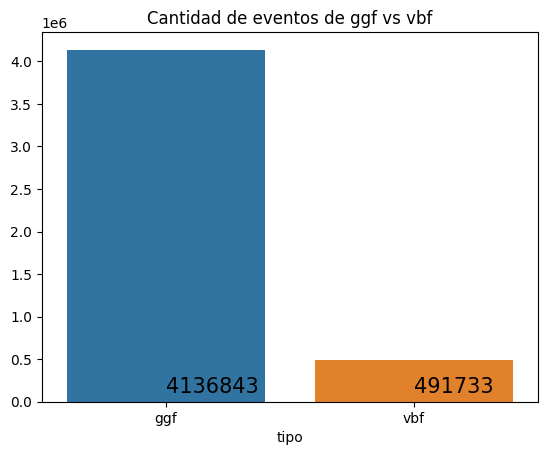

In [3]:
sns.barplot(x=df['tipo'].value_counts().index, y=df['tipo'].value_counts().values)
plt.title('Cantidad de eventos de ggf vs vbf')
plt.text(0, 100000, df['tipo'].value_counts().values[0], fontsize=15)
plt.text(1, 100000, df['tipo'].value_counts().values[1], fontsize=15)
plt.show()  

Se crea una columnas llamada 'tipo' la cual sirve para identificar si el evento corresponde a un evento de vbf o ggf.
Luego, a partir de esta columna se crea otra dummy para poder usarlo como vector objetivo.


In [4]:
df1 = df.copy()
df1 = df1[df1['weights'] >= 0] #eliminar weights negativos y ceros
df1['VBF label'] = df1['tipo'].apply(lambda x: 1 if x == 'vbf' else 0) #crear columna con 1 para vbf y 0 para ggf

ml_var = ['mjj', "dphijj", "detajj", 'MET',
              'jet1_pt',
              'jet1_eta',
              'jet1_e',
              'jet2_pt',
              'jet2_eta',
              'jet2_e',]

X_ggf = df1[df1['tipo'] == 'ggf']
print("Cantidad de eventos de MC de ggF: ", X_ggf.shape)
print("Cantidad de eventos de MC de ggF luego de corte njet30:", X_ggf.shape)
# X_ggf_1_0_jet = X_ggf[X_ggf['njet30'] < 2]
X_vbf = df1[df1['tipo'] == 'vbf']
#X_vbf = X_vbf[X_vbf['njet30'] >1] # Se consideran eventos de ggF con al menos 2 jets.

X_ggf_vbf = pd.concat([X_ggf, X_vbf], axis=0)

Cantidad de eventos de MC de ggF:  (4136843, 16)
Cantidad de eventos de MC de ggF luego de corte njet30: (4136843, 16)


In [5]:
X_vbf.shape
# X_vbf[X_vbf['njet30'] <2].shape

(491044, 16)

In [6]:
df.shape

(4628576, 15)

In [7]:
print(X_vbf.shape)
print(X_ggf.shape)

(491044, 16)
(4136843, 16)


In [8]:
print(X_ggf_vbf.shape)
X_ggf_vbf

(4627887, 16)


,mjj,dphijj,detajj,MET,jet1_pt,jet1_eta,jet1_e,jet2_pt,jet2_eta,jet2_e,njet30,intLumi,scale1fb,weights,tipo,VBF label
0,1.635499e+05,-2.570451,0.501867,74265.851562,128728.367188,-1.605733,3.337677e+05,52183.613281,-1.103866,8.745945e+04,4,36.099998,0.047943,1.730729,ggf,0
1,2.156652e+05,2.615153,2.573857,9079.842773,62673.781250,0.385422,6.801921e+04,48930.621094,2.959279,4.731216e+05,2,36.099998,0.033863,1.222444,ggf,0
2,-9.990000e+02,-999.000000,-999.000000,23493.593750,39789.089844,-1.226331,7.379085e+04,-999.000000,-999.000000,-9.990000e+02,1,36.099998,0.041334,1.492153,ggf,0
3,-9.990000e+02,-999.000000,-999.000000,15051.750000,30304.716797,-0.541434,3.554019e+04,-999.000000,-999.000000,-9.990000e+02,1,36.099998,0.047489,1.714360,ggf,0
4,-9.990000e+02,-999.000000,-999.000000,7429.219727,-999.000000,-999.000000,-9.990000e+02,-999.000000,-999.000000,-9.990000e+02,0,36.099998,0.042143,1.521348,ggf,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4628571,1.367926e+06,0.648911,4.957650,216401.265625,116440.851562,-3.211884,1.447791e+06,114172.210938,1.745765,3.373078e+05,2,36.099998,0.000256,0.009256,vbf,1
4628572,1.540464e+06,-0.568785,5.033163,191440.421875,134930.218750,3.088001,1.482836e+06,115863.156250,-1.945162,4.136839e+05,3,36.099998,0.000305,0.011002,vbf,1
4628573,1.694813e+06,-2.918931,5.825066,35132.878906,110081.000000,3.609008,2.034103e+06,76587.546875,-2.216058,3.554840e+05,2,1.000000,0.000271,0.000271,vbf,1
4628574,7.387971e+05,0.789625,5.037199,97912.656250,105132.671875,-0.351721,1.122496e+05,33879.730469,4.685478,1.835801e+06,3,36.099998,0.000282,0.010165,vbf,1


In [9]:
X_ggf_vbf['VBF prediction str'] = X_ggf_vbf.apply(lambda row: 'vbf' if ((row['mjj'] > 1000000) & (row["njet30"] >1)) else 'ggf', axis=1)
#X_ggf_vbf['VBF prediction str'] = X_ggf_vbf.apply(lambda row: 'vbf' if row['detajj'] > 3.328047691219524 else 'ggf', axis=1) #and (row['jet1_pt'] < 192841) else 'ggf'and (row['jet1_pt'] < 192841) else 'ggf'

X_ggf_vbf['VBF prediction'] = X_ggf_vbf["VBF prediction str"].apply(lambda x: 1 if x == 'vbf' else 0)

In [10]:
print(X_ggf_vbf[(X_ggf_vbf["VBF prediction"] == 1) & (X_ggf_vbf["tipo"] =='vbf' )]["weights"].sum())
print(X_ggf_vbf[(X_ggf_vbf["VBF prediction"] == 0) & (X_ggf_vbf["tipo"] =='vbf' )]["weights"].sum())


7029.4575
3879.9912


In [11]:
# X_result_vbf['Resultado'] = 'vbf'
# X_result_ggf['Resultado'] = 'ggf'

# X_result_vbf['Resultado clase'] = 'vbf'
# X_result_ggf['Resultado clase'] = 'ggf'

# df_resultado = pd.concat([X_result_vbf, X_result_ggf], axis=0)
# df_resultado['Resultado clase'] = df_resultado['Resultado'].apply(lambda x: 1 if x == 'vbf' else 0)


c:\Users\jav90\envs\dpj_env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\jav90\envs\dpj_env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\jav90\envs\dpj_env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\jav90\envs\dpj_env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_exten

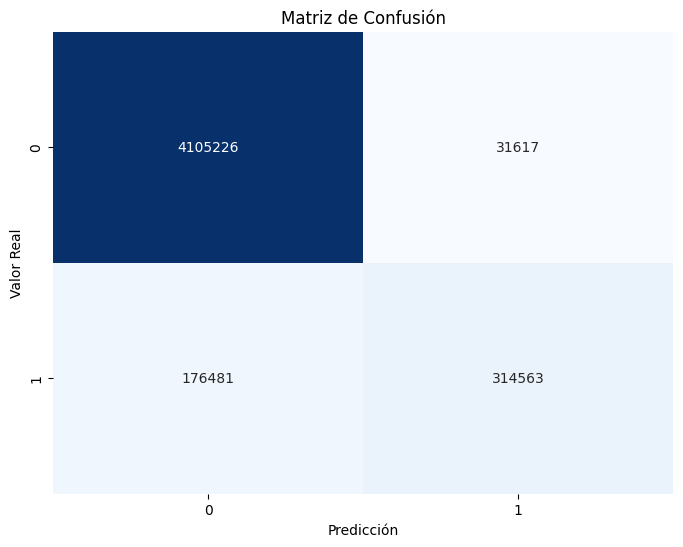

In [12]:
cm = confusion_matrix(X_ggf_vbf['VBF label'], X_ggf_vbf['VBF prediction'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

In [13]:
print(classification_report(X_ggf_vbf['VBF label'], X_ggf_vbf['VBF prediction']))

c:\Users\jav90\envs\dpj_env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\jav90\envs\dpj_env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\jav90\envs\dpj_env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\jav90\envs\dpj_env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_exten

              precision    recall  f1-score   support

           0       0.96      0.99      0.98   4136843
           1       0.91      0.64      0.75    491044

    accuracy                           0.96   4627887
   macro avg       0.93      0.82      0.86   4627887
weighted avg       0.95      0.96      0.95   4627887



In [14]:
cm[1][1]/(cm[1][0]+cm[1][1])

0.6406004349915689

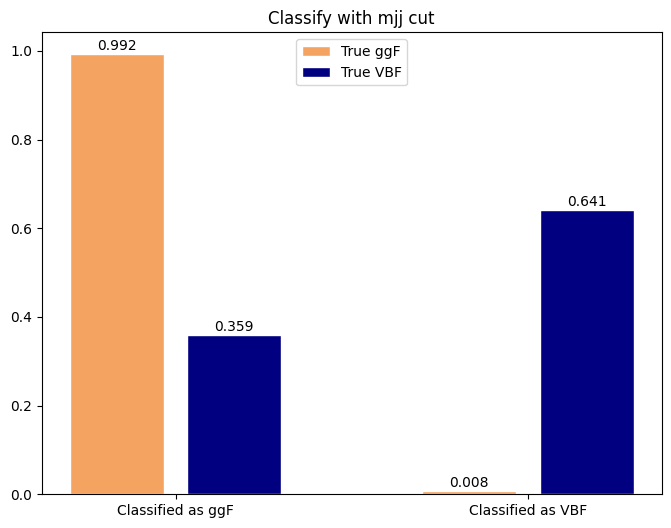

In [15]:



ggf_as_ggf = cm[0,0]
ggf_as_vbf = cm[0,1]
vbf_as_ggf = cm[1,0]
vbf_as_vbf = cm[1,1]
bars1 = np.array([ggf_as_ggf, ggf_as_vbf]) / (ggf_as_ggf+ggf_as_vbf)#+df2_not_used[df2_not_used['tipo'] == 'ggf'].shape[0])
bars2 = np.array([vbf_as_ggf, vbf_as_vbf]) / (vbf_as_ggf+vbf_as_vbf)#+df2_not_used[df2_not_used['tipo'] == 'vbf'].shape[0])
pos1 = [0,3]
pos2 = [1,4]
plt.figure(figsize=(8, 6))
plt.bar(pos1, bars1, width=.8, color='sandybrown', edgecolor='white', label='True ggF')
plt.bar(pos2, bars2, width=.8, color="navy", edgecolor='white', label='True VBF')
plt.xticks([.5,3.5] ,['Classified as ggF','Classified as VBF'])

for i in range(2):
     plt.text(pos1[i], bars1[i] + 0.01, str(round(bars1[i],3)), ha='center')
     plt.text(pos2[i], bars2[i] + 0.01, str(round(bars2[i],3)), ha='center')
plt.title("Classify with mjj cut")
plt.legend(loc='upper center')

In [118]:
X_ggf_vbf['mjj'] = X_ggf_vbf['mjj']/1000


c:\Users\jav90\envs\dpj_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jav90\envs\dpj_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jav90\envs\dpj_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jav90\envs\dpj_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.

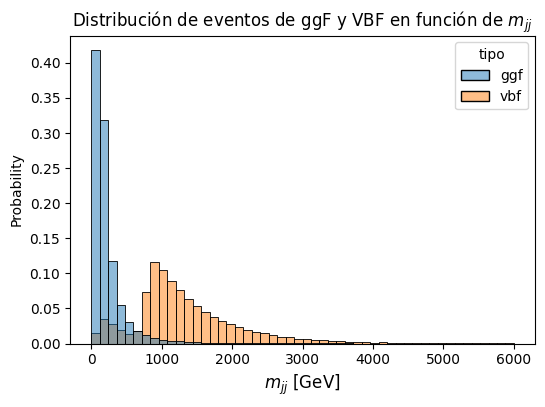

In [119]:
dist = 'mjj'
plt.figure(figsize=(6, 4))

#sns.histplot(data=X_ggf_vbf, x=dist, hue="VBF prediction str", element="step", stat="count", common_norm=True, fill=True, bins=100)
sns.histplot(
        X_ggf_vbf,
        x=dist,
        hue='tipo',
      binrange = (0, 6000),
        # binwidth = bin_width,
        bins = 50,
        weights='weights',
        stat="probability", common_norm=False,
        # stat='count', #could be count, probability, density, or probability density
        log_scale=(False, False),
        #dont show legend name
        legend=True,
        alpha=0.5)
      #  ax = axes[0]#
#plt.xlim(0, 1000000)
plt.title("Distribución de eventos de ggF y VBF en función de $m_{jj}$")
plt.xlabel("$m_{jj}$ [GeV]", fontsize=12)
#plt.yscale('log')
plt.show()

c:\Users\jav90\envs\dpj_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jav90\envs\dpj_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jav90\envs\dpj_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jav90\envs\dpj_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.

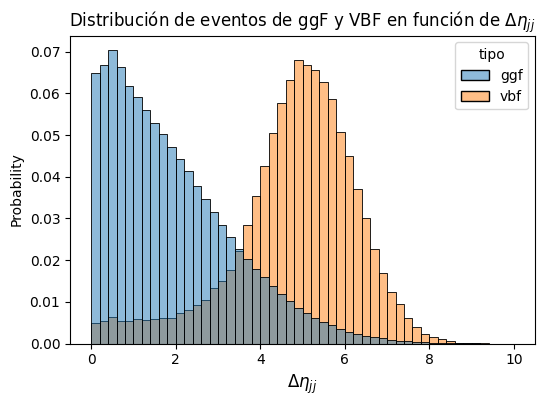

In [82]:
dist = 'detajj'
plt.figure(figsize=(6, 4))

#sns.histplot(data=X_ggf_vbf, x=dist, hue="VBF prediction str", element="step", stat="count", common_norm=True, fill=True, bins=100)

sns.histplot(
        X_ggf_vbf,
        x=dist,
        hue='tipo',
        binrange = (0, 10),
        # binwidth = bin_width,
        bins = 50,
        weights='weights',
        stat="probability", common_norm=False,
        # stat='count', #could be count, probability, density, or probability density
        log_scale=(False, False),
        #dont show legend name
        legend=True,
        alpha=0.5)
      #  ax = axes[0]#
#plt.xlim(0, 1000000)
plt.title("Distribución de eventos de ggF y VBF en función de $\Delta\eta_{jj}$")
plt.xlabel('$\Delta\eta_{jj}$', fontsize=12)
#plt.yscale('log')
plt.show()

In [115]:
X_ggf_vbf['jet1_pt'] = X_ggf_vbf['jet1_pt']/1000

c:\Users\jav90\envs\dpj_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jav90\envs\dpj_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jav90\envs\dpj_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jav90\envs\dpj_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.

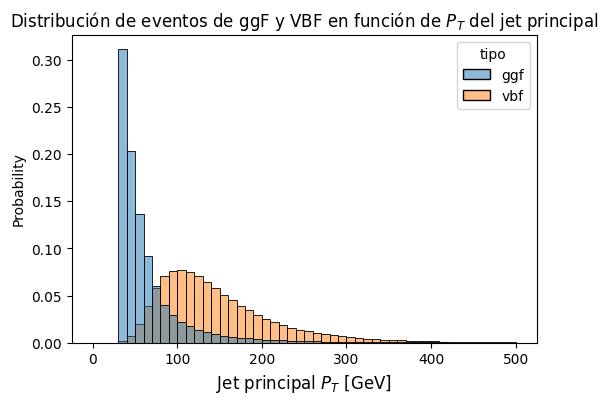

In [120]:
dist = 'jet1_pt'
plt.figure(figsize=(6, 4))
sns.histplot(
        X_ggf_vbf,
        x=dist,
        hue='tipo',
      binrange = (0, 500),
        # binwidth = bin_width,
        bins = 50,
        weights='weights',
        stat="probability", common_norm=False,
        # stat='count', #could be count, probability, density, or probability density
        log_scale=(False, False),
        #dont show legend name
        legend=True,
        alpha=0.5)
      #  ax = axes[0]#
#plt.xlim(0, 1000000)
plt.title("Distribución de eventos de ggF y VBF en función de $P_{T}$ del jet principal")
plt.xlabel('Jet principal $P_{T}$ [GeV]', fontsize=12)
#plt.yscale('log')
plt.show()

In [123]:
X_ggf_vbf["MET"] = X_ggf_vbf["MET"]/1000

c:\Users\jav90\envs\dpj_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jav90\envs\dpj_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jav90\envs\dpj_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jav90\envs\dpj_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.

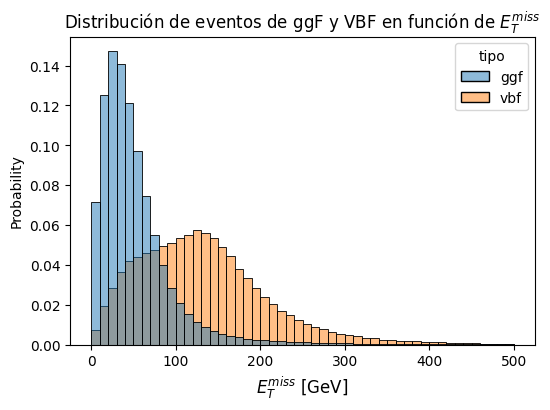

In [125]:
dist = 'MET'
plt.figure(figsize=(6, 4))
sns.histplot(
        X_ggf_vbf,
        x=dist,
        hue='tipo',
       binrange = (0, 500),
        # binwidth = bin_width,
        bins = 50,
        weights='weights',
        stat="probability", common_norm=False,
        # stat='count', #could be count, probability, density, or probability density
        log_scale=(False, False),
        #dont show legend name
        legend=True,
        alpha=0.5)
      #  ax = axes[0]#
#plt.xlim(0, 1000000)
plt.title("Distribución de eventos de ggF y VBF en función de $E_{T}^{miss}$")
plt.xlabel('$E_{T}^{miss}$ [GeV]', fontsize=12)
#plt.yscale('log')
plt.show()

c:\Users\jav90\envs\dpj_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jav90\envs\dpj_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jav90\envs\dpj_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jav90\envs\dpj_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.

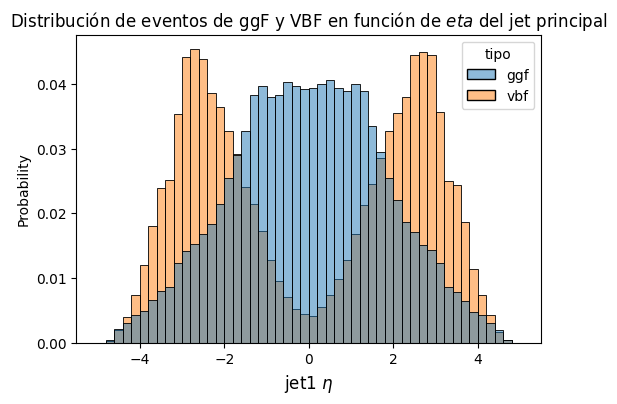

In [15]:
dist = 'jet1_eta'
plt.figure(figsize=(6, 4))

#sns.histplot(data=X_ggf_vbf, x=dist, hue="VBF prediction str", element="step", stat="count", common_norm=True, fill=True, bins=100)

sns.histplot(
        X_ggf_vbf,
        x=dist,
        hue='tipo',
        binrange = (-5,5),
        # binwidth = bin_width,
        bins = 50,
        weights='weights',
        stat="probability", common_norm=False,
        # stat='count', #could be count, probability, density, or probability density
        log_scale=(False, False),
        #dont show legend name
        legend=True,
        alpha=0.5)
      #  ax = axes[0]#
#plt.xlim(0, 1000000)
plt.title("Distribución de eventos de ggF y VBF en función de $eta$ del jet principal")
plt.xlabel('jet1 $\eta$', fontsize=12)
#plt.yscale('log')
plt.show()

In [70]:
X_ggf_vbf["detajj"].describe()

count    4.627887e+06
mean    -5.634105e+02
std      4.965512e+02
min     -9.990000e+02
25%     -9.990000e+02
50%     -9.990000e+02
75%      1.796485e+00
max      9.386436e+00
Name: detajj, dtype: float64

In [38]:
variables_plot = ['mjj', "dphijj", "detajj", 'MET',
              'jet1_pt',
             # 'jet1_eta',
             # 'jet1_e',
             # 'jet2_pt',
             # 'jet2_eta',
              #'jet2_e',
              ]

# for dist in variables_plot:
    
#     plt.figure(figsize=(8, 6))
#     sns.histplot(data=X_ggf_vbf, x=dist, hue="VBF prediction str", element="step", stat="density", common_norm=False, fill=False, bins=100)
#     if dist == 'mjj':
#         plt.xlim(0, 4e6)
    
#     plt.title(dist)
#     plt.show()

In [39]:


for dist in variables_plot:
    n_bins = 40
    print(dist)
    if dist == 'njet30':
        bin_range = (0, 7)
        n_bins = 7
        df_var = df_njet30_t1
        label = 'Jet multiplicity'
    elif dist == 'detajj':
        bin_range = r_detajj
        bin_width = 0.1
        df_var = df_detajj_t1
        label = '\Delta\eta_{jj}'
        #label = 'deta jj'
    if dist == 'mjj':
        bin_range = r_mjj
        bin_width = 50
        df_var = df_mjj_t1
        label = 'm_{jj}(GeV)'
    #elif dist == 'metTrig':
    #    bin_range = (0, 3)
    #  
    # elif dist == 'neleSignal':
    #     bin_range = (0, 3)
    #     bin_width = 1
    #     df_var = df_nele_t1
    #     label = 'electron multiplicity'
    # elif dist == 'nmuSignal':
    #     bin_range = (0, 3)
    #     bin_width = 1
    #     df_var = df_nmu_t1
    #     label = 'muon multiplicity'
    # elif dist == 'nLJmus20':
    #     bin_range = (0, 2)
    #     bin_width = 1
    #     df_var = df_nLJmus20_t1
    #     label = 'DPJ multiplicity'
    # elif dist == 'nLJjets20':
    #     bin_range = (0, 6)
    #     bin_width = 1
    #     df_var = df_nLJjets20_t1
    #     label = 'caloDPJ multiplicity'
    # elif dist == 'LJjet1_gapRatio':
    #     bin_range = (0, 1)
    #     bin_width = 0.01
    #     df_var = df_LJjet1_gapRatio_t1
    #     label = 'gap ratio'
    # elif dist == 'min_dphi_jetmet':
    #     bin_range = (0, 3.2)
    #     bin_width = 0.01
    #     df_var = df_min_dphi_jetmet_t1
    #     label = '
    elif dist == 'dphijj':
        bin_range = (-3.2, 3.2)
        bin_width = 0.1
        df_var = df_dphijj_t1
        label = '\Delta\phi_{jj}'
    elif dist == 'jet1_pt':
        bin_range = r_jet1_pt
        bin_width = 0.01
        df_var = df_jet1_pt_t1
        label = 'Leading Jet (GeV)'
    elif dist == 'jet1_eta':
        bin_range = r_jet_eta
        df_var = df_jet1_eta_t1
        label = 'Leading Jet \eta (GeV)'
    # elif dist == 'LJjet1_BIBtagger':
    #     bin_range = (0, 1)
    #     bin_width = 0.01
    #     df_var = df_bib_t1
    #     label = 'BIB tagger'
    # elif dist == 'LJjet1_jvt':
    #     bin_range = (0, 1)
    #     bin_width = 0.01
    #     df_var = df_jvt_t1
    #     label = 'JVT tagger'
    # elif dist == 'LJjet1_DPJtagger':
    #     bin_range = (0, 1)
    #     bin_width = 0.01
    #     df_var = df_dpj_t1
    #     label = 'QCD tagger'
    # elif dist == 'LJjet1_isoID':
    #     bin_range = (0, 100)
    #     bin_width = 1
    #     df_var = df_LJjet1_isoID_t1
    #     label = 'isoID (GeV)'

    f, axes = plt.subplots(2,1, figsize=(8,10), gridspec_kw={'height_ratios': [3, 1]})

    ax1 = sns.histplot(
        df_test,
        x=dist,
        hue='sample',
        binrange = bin_range,
        # binwidth = bin_width,
        bins = n_bins,
        weights='weight',
        stat="probability", common_norm=False,
        # stat='count', #could be count, probability, density, or probability density
        log_scale=(False, False),
        #dont show legend name
        legend=True,
        alpha=0.5,
        ax = axes[0]
    )
    # add a subplot with the significance below the histplot
    ax2 = sns.lineplot(
        df_var,
        x=dist,
        y='significance',
        color='red',
        ax = axes[1],
        label = "Significance",
        legend=False
    )
    axt = axes[1].twinx()
    ax3 = sns.lineplot(
        df_var,
        x=dist,
        y='class score',
        color='blue',
        ax = axt,
        label = "Class score",
        legend=False
    )

    lines, labels = axes[1].get_legend_handles_labels()
    lines2, labels2 = axt.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc="upper right")

    # remove x label from ax1
    ax1.set_xlabel('')
    # remove number in x axis from ax1
    ax1.set_xticks([])
    ## set y label name according to bin width
    ax1.set_ylabel("Events")
    # set x label name
    ax2.set_xlabel(label)
    ## removing legend title
    ax1.legend_.set_title(None)
    # set legend location
    sns.move_legend(ax1, "upper right")
    #print hep.atlas.label in ax1
    hep.atlas.label('Simulation', data=True, lumi=140, year=2018, ax=ax1)
    #increase vertical size of ax1
    # ax1.set_ylim(top=0.5)
    ax1.set_ylim(top=ax1.get_ylim()[1]*5/4)
    ax2.set_ylim(top=ax2.get_ylim()[1]*3/2, bottom=0)
    ax3.set_ylim(top=ax3.get_ylim()[1]*3/2, bottom=0)
    tkw = dict(length=12, width=1.5, direction="inout")
    ax2.tick_params(axis='y', **tkw)
    ax3.tick_params(axis='y', **tkw)
    ax2.tick_params(axis='x', **tkw)
    plt.show()

mjj


NameError: name 'r_mjj' is not defined